# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [5]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [6]:
data.sample(4)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1479,4336,8/18/2000,The Original Kings of Comedy,"$3,000,000","$38,236,338","$38,168,022"
5142,4506,2/9/2016,Antibirth,"$2,500,000",$0,$0
2393,4920,3/18/2005,The Helix…Loaded,"$1,000,000","$3,700","$3,700"
2884,769,3/30/2007,Blades of Glory,"$61,000,000","$145,594,548","$118,594,548"


In [7]:
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns")

The dataset contains 5391 rows and 6 columns


In [8]:
data.isnull().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [9]:
# Now lets check if there is any duplicates in data
data.duplicated().sum()

0

In [10]:
# Now Lets check the data type of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [11]:
# Lets Convert the USD_Production_Budget, USD_Worldwide_Gross, and USD_Domestic_Gross columns to a numeric

data['USD_Production_Budget'] = pd.to_numeric(data['USD_Production_Budget'].str.replace('$',',').str.replace(',',''))
data['USD_Worldwide_Gross'] = pd.to_numeric(data['USD_Worldwide_Gross'].str.replace('$',',').str.replace(',',''))
data['USD_Domestic_Gross'] = pd.to_numeric(data['USD_Domestic_Gross'].str.replace('$',',').str.replace(',',''))

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [13]:
data['Release_Date']=pd.to_datetime(data['Release_Date'])

In [14]:
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object

In [15]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [16]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


In [17]:
# What is the average production budget of the films in the data set?
data['USD_Production_Budget'].mean()

31113737.57837136

In [18]:
# What is the average worldwide gross revenue of films?
data['USD_Worldwide_Gross'].mean()

88855421.96271564

In [19]:
# What were the minimums for worldwide and domestic revenue?
print(data['USD_Worldwide_Gross'].min())
print(data['USD_Domestic_Gross'].min())

0
0


In [20]:
(data.shape[0]*25)//100

1347

In [21]:
# Are the bottom 25% of films actually profitable or do they lose money?
sorted_data = data.sort_values(by='USD_Production_Budget')[:1347]

In [22]:
sorted_data['profit']=(sorted_data['USD_Domestic_Gross']+sorted_data['USD_Worldwide_Gross'])-sorted_data['USD_Production_Budget']

In [23]:
sorted_data['profit_categorised']=sorted_data['profit'].map(lambda x:"loss" if x<0  else "profit")

In [24]:
sorted_data['profit_categorised'].value_counts()

profit_categorised
profit    701
loss      646
Name: count, dtype: int64

In [25]:
# What are the highest production budget and highest worldwide gross revenue of any film?

data.sort_values(by='USD_Production_Budget',ascending=False).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [26]:
data.sort_values(by='USD_Worldwide_Gross',ascending=False).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [27]:
# How much revenue did the lowest and highest budget films make?
data.sort_values(by='USD_Production_Budget',ascending=True).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [28]:
nothing_domestic = data[data['USD_Domestic_Gross']==0]

In [29]:
nothing_domestic.shape

(512, 6)

In [30]:
nothing_domestic.sort_values(by='USD_Production_Budget',ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [31]:
world_nothing=data[data['USD_Worldwide_Gross']==0]

In [32]:
world_nothing.shape

(357, 6)

In [33]:
world_nothing.sort_values(by='USD_Production_Budget',ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [34]:
data.loc[(data['USD_Domestic_Gross']==0)&(data['USD_Worldwide_Gross']!=0)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [35]:
 data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [36]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [37]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [38]:
data.shape

(5391, 6)

In [39]:
future_releases = data[data['Release_Date']>scrape_date]

In [40]:
data[data['Release_Date']<scrape_date].query('USD_Domestic_Gross==0 and USD_Worldwide_Gross==0').shape

(350, 6)

In [41]:
data_clean = data.drop(future_releases.index)

In [42]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [43]:
data_clean.query('USD_Production_Budget>USD_Worldwide_Gross').shape[0]/data_clean.shape[0]

0.37277117384843983

In [44]:
money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
len(money_losing)/len(data_clean)

0.37277117384843983

# Seaborn for Data Viz: Bubble Charts

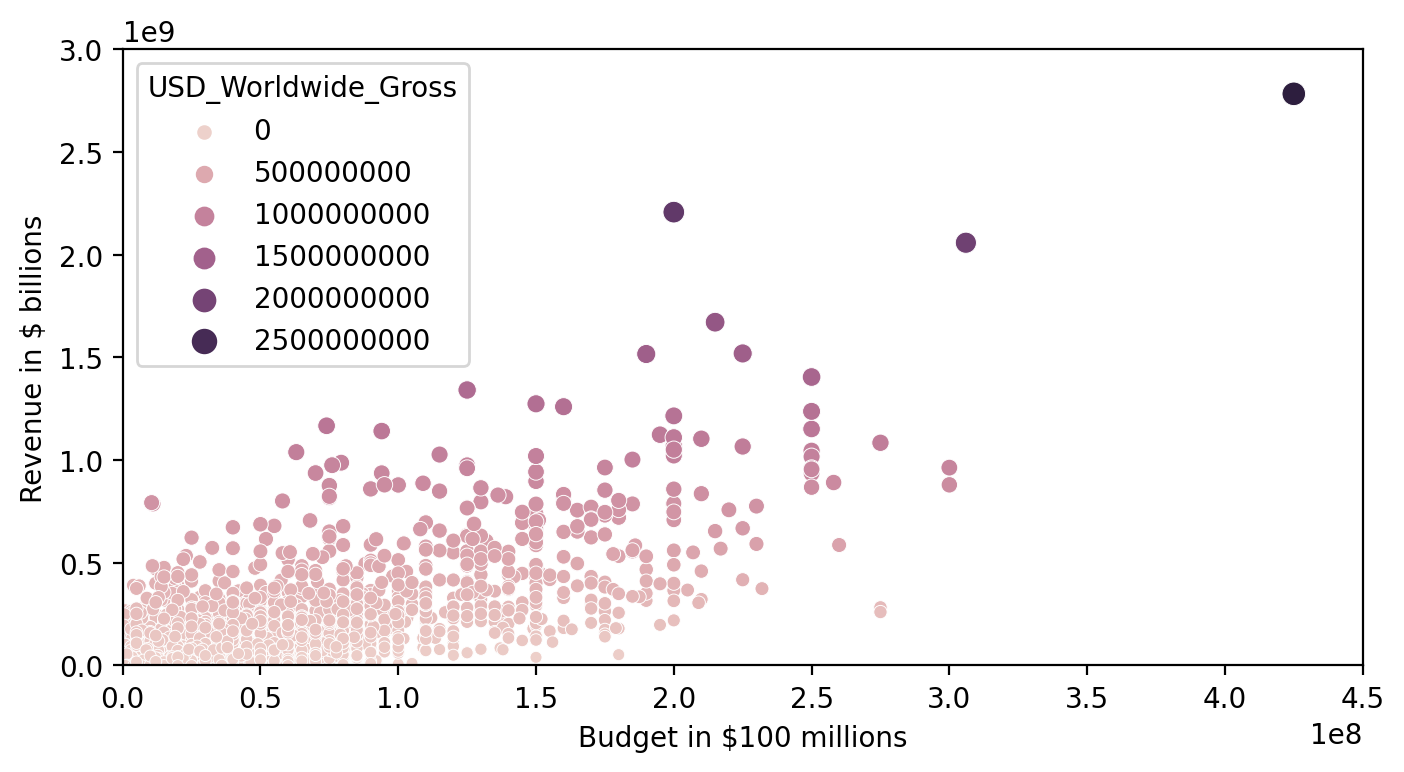

In [51]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

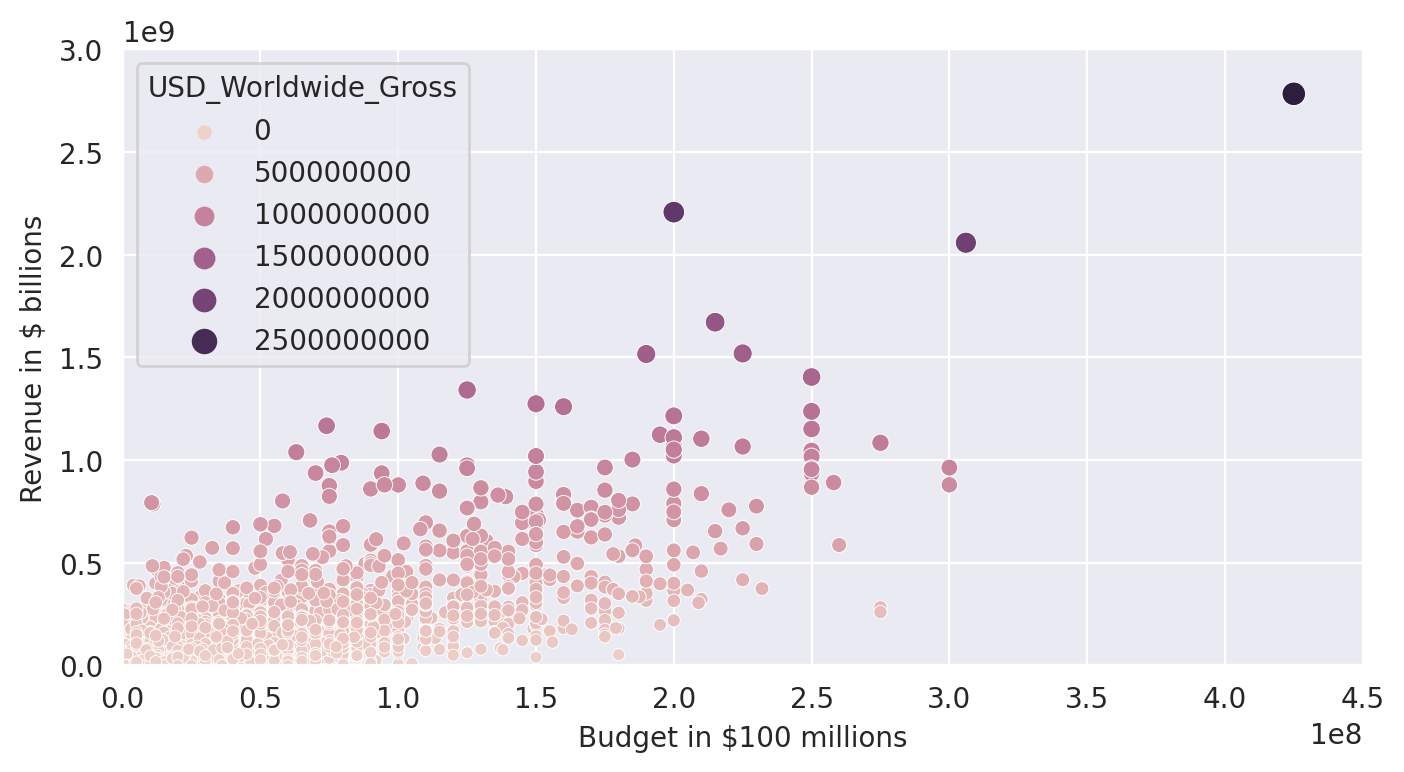

In [56]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



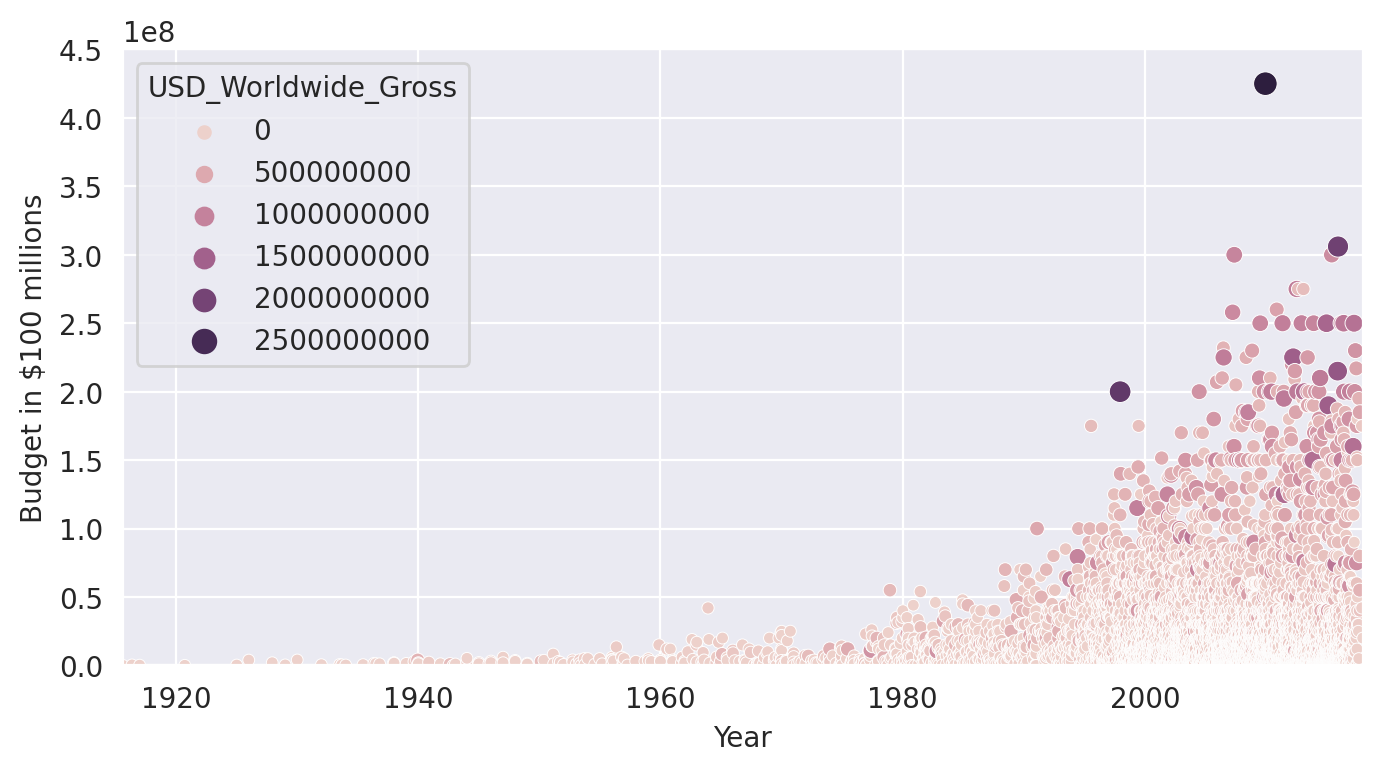

In [67]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean,
                     x='Release_Date', 
                     y='USD_Production_Budget',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 450000000),
       xlim=(data_clean['Release_Date'].min(),data_clean['Release_Date'].max() ),
       ylabel='Budget in $100 millions',
       xlabel='Year',)
 
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [68]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [84]:
data_clean['Decade']=(pd.DatetimeIndex(data_clean['Release_Date']).year//10)*10

In [89]:
data_clean[['Release_Date','Decade']][:20].head()

,Release_Date,Decade
0,1915-08-02,1910
1,1916-05-09,1910
2,1916-12-24,1910
3,1920-09-17,1920
4,1925-01-01,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [98]:
data_clean['old_films and new_films']=data_clean['Decade'].map(lambda x: 'old_films' if x<=1969 else 'new_films' )

In [103]:
# 
print(f"prior to 1970 just  {data_clean[data_clean['old_films and new_films']=='old_films'].shape[0]} films where relesed")
old_films_data = data_clean[data_clean['old_films and new_films']=='old_films']

prior to 1970 just  153 films where relesed


In [121]:
old_films_data.loc[old_films_data['USD_Production_Budget'].idxmax()]

Rank                                      1253
Release_Date               1963-12-06 00:00:00
Movie_Title                          Cleopatra
USD_Production_Budget                 42000000
USD_Worldwide_Gross                   71000000
USD_Domestic_Gross                    57000000
Decade                                    1960
old_films and new_films              old_films
Name: 109, dtype: object

In [123]:
new_films_data = data_clean[data_clean['old_films and new_films']=='new_films']

In [124]:
new_films_data.shape

(5231, 8)

In [128]:
data_clean.loc[data_clean['USD_Production_Budget'].idxmax()]

Rank                                         1
Release_Date               2009-12-18 00:00:00
Movie_Title                             Avatar
USD_Production_Budget                425000000
USD_Worldwide_Gross                 2783918982
USD_Domestic_Gross                   760507625
Decade                                    2000
old_films and new_films              new_films
Name: 3529, dtype: object

# Seaborn Regression Plots

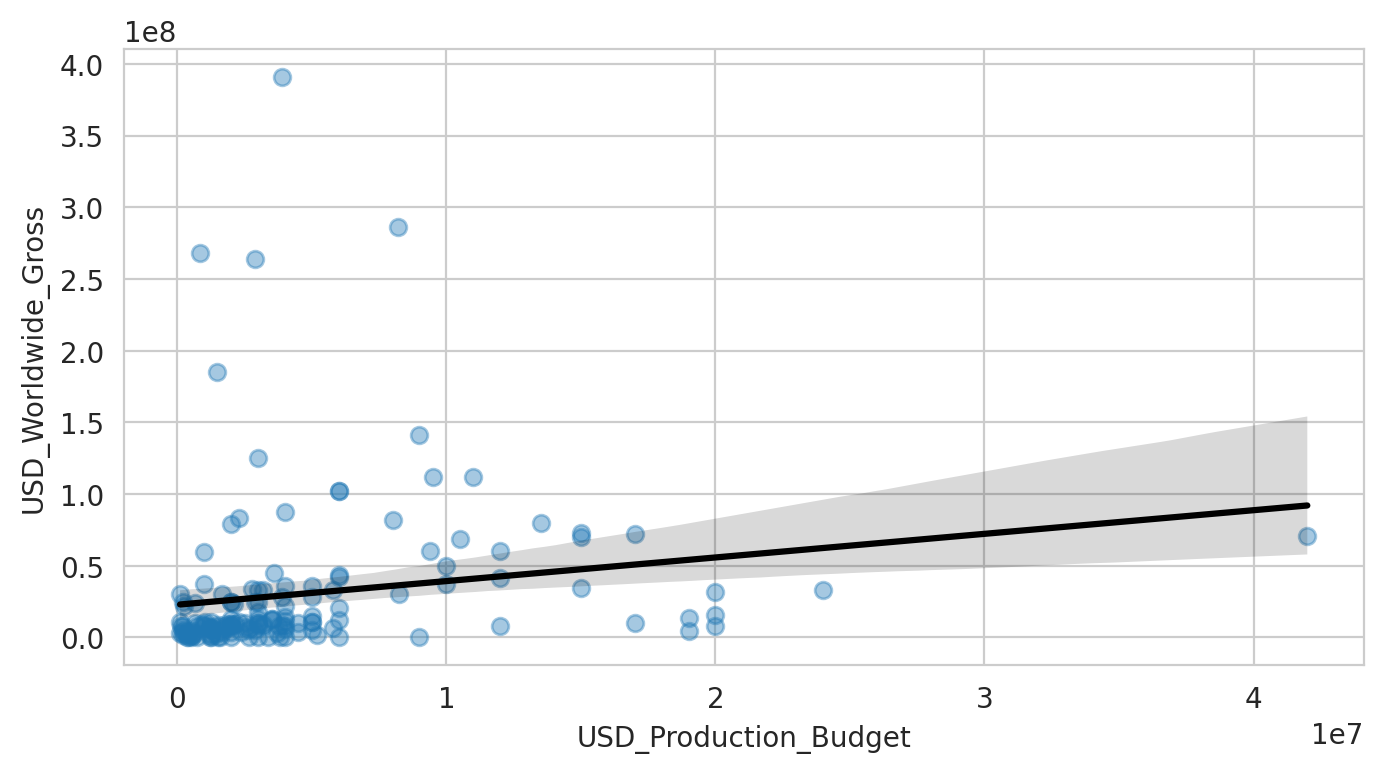

In [132]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films_data, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

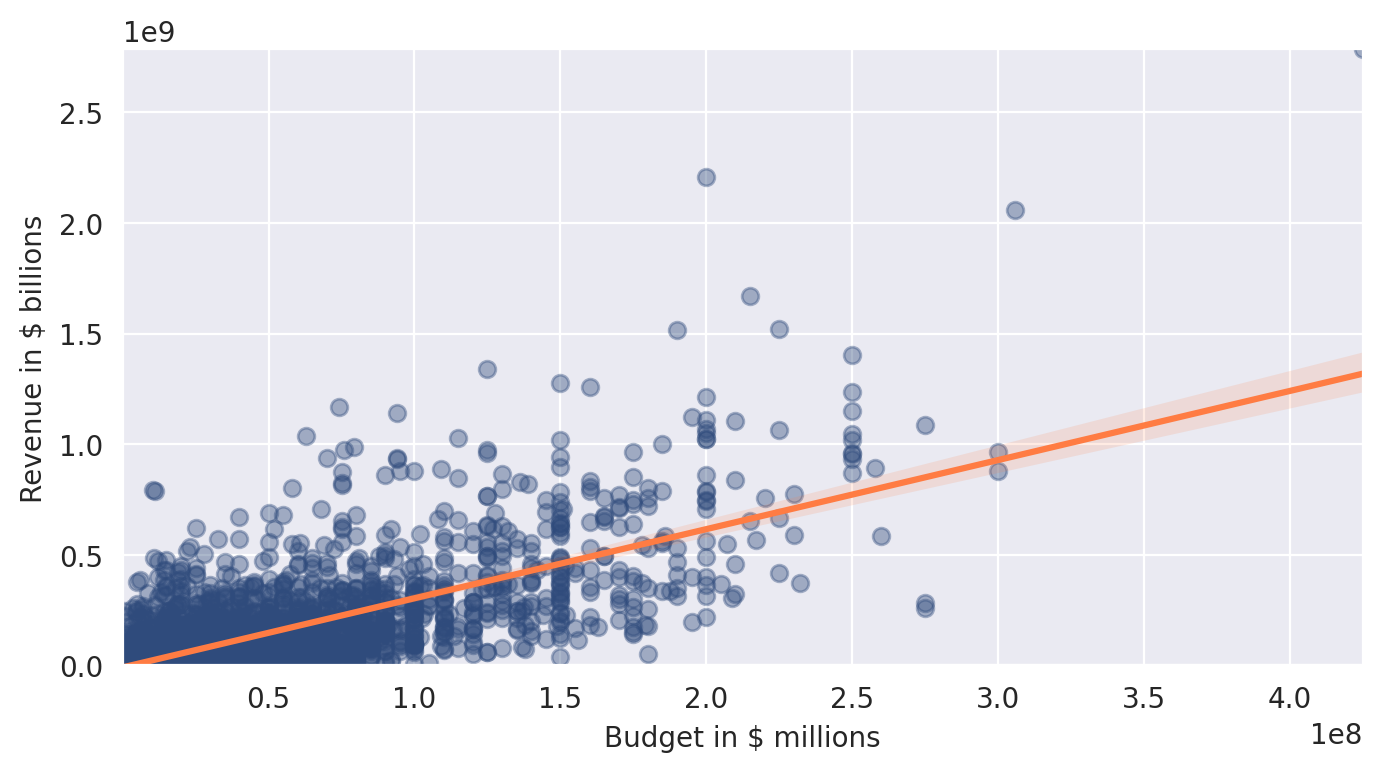

In [141]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax=sns.regplot(data=new_films_data, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            color='#2f4b7c',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': '#ff7c43'})
ax.set(ylim=(new_films_data['USD_Worldwide_Gross'].min(), new_films_data['USD_Worldwide_Gross'].max()),
       xlim=(data_clean['USD_Production_Budget'].min(),data_clean['USD_Production_Budget'].max() ),
       ylabel="Revenue in $ billions",
       xlabel="Budget in $ millions",)
 
plt.show()

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

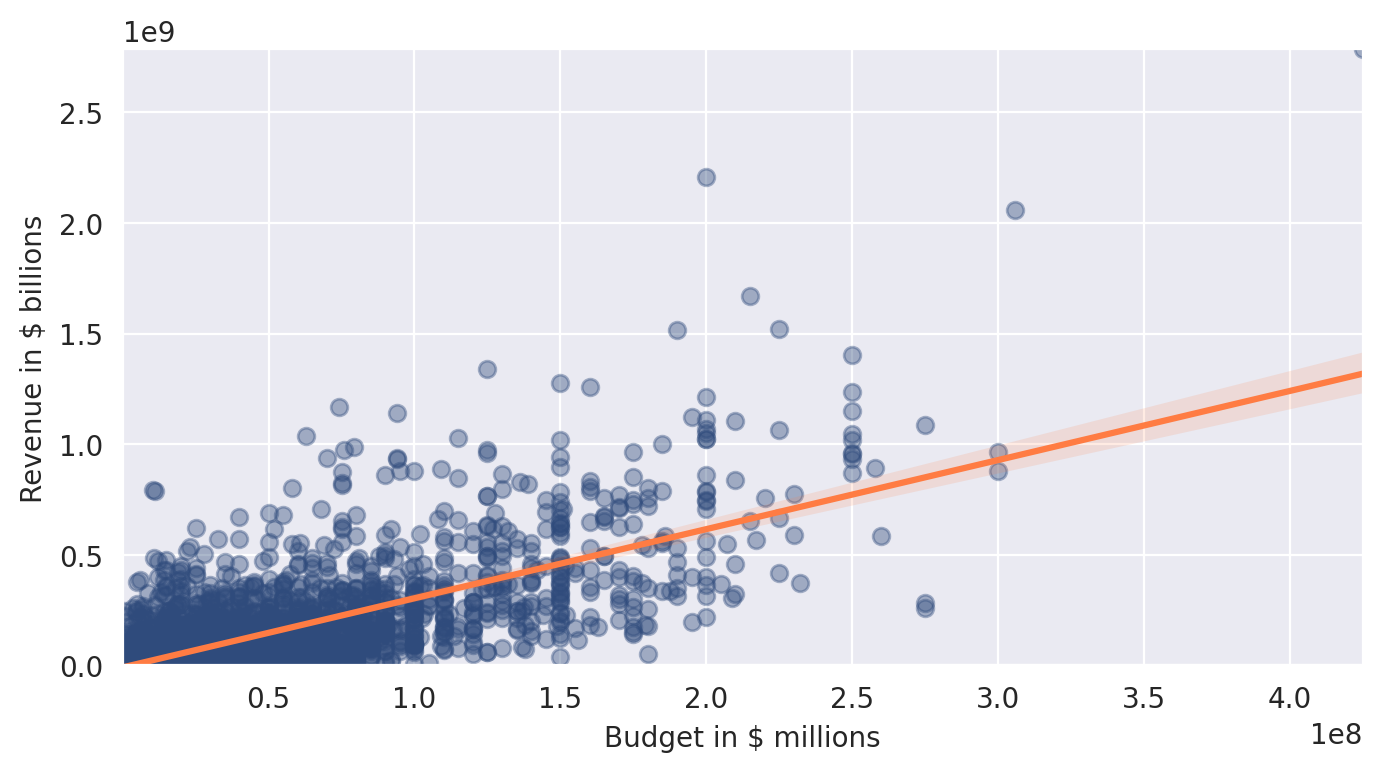

In [143]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax=sns.regplot(data=new_films_data, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            color='#2f4b7c',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': '#ff7c43'})
ax.set(ylim=(new_films_data['USD_Worldwide_Gross'].min(), new_films_data['USD_Worldwide_Gross'].max()),
       xlim=(data_clean['USD_Production_Budget'].min(),data_clean['USD_Production_Budget'].max() ),
       ylabel="Revenue in $ billions",
       xlabel="Budget in $ millions",)
 
plt.show()

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [154]:
reg = LinearRegression()

In [155]:
X=pd.DataFrame(old_films_data,columns=['USD_Production_Budget'])
y=pd.DataFrame(old_films_data,columns=['USD_Worldwide_Gross'])

In [156]:
reg.fit(X,y)

LinearRegression()

In [157]:
reg.intercept_

array([22821538.63508038])

In [158]:
reg.coef_

array([[1.64771314]])

In [160]:
reg.score(X,y)

0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [161]:
regression = LinearRegression()

In [162]:
# Explanatory Variable(s) or Feature(s)
X=pd.DataFrame(new_films_data,columns=['USD_Production_Budget'])
# Response Variable or Target
y=pd.DataFrame(new_films_data,columns=['USD_Worldwide_Gross'])

In [163]:
# Find the best-fit line
regression.fit(X,y)

LinearRegression()

In [164]:
# Theta Zero
regression.intercept_

array([-8650768.00661033])

In [165]:
# Theta one
regression.coef_

array([[3.12259592]])

In [166]:
# R-squared
regression.score(X, y)

0.5577032617720403

In [180]:
22821538 + 1.64771314 * 350000000

599521137.0

In [181]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $1.084e+09.


In [177]:
pre = np.array(350000000).reshape(-1, 1)
pre

array([[350000000]])

In [179]:
regression.predict(pre)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1.0842578e+09]])